In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']

In [4]:
df = pd.DataFrame(features, columns = feature_names)
df['target'] = label

In [5]:
seto = df[df['target'] == 0]
versi = df[df['target'] == 1]
virgi = df[df['target'] == 2]

## 1 T-test

Setosa, Versicolor의 sepal length의 차이가 유의한가?

In [8]:
seto.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
seto_sepal_length = seto['sepal length (cm)']

In [11]:
versi_sepal_length = versi['sepal length (cm)']

## 1-1 Data exploring

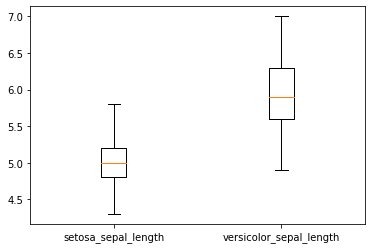

In [13]:
plt.boxplot([seto_sepal_length, versi_sepal_length])
plt.xticks([1,2], ['setosa_sepal_length', 'versicolor_sepal_length'])
plt.show()

## 1-2 Normality test

In [14]:
from scipy import stats

In [15]:
normal_seto = stats.shapiro(seto_sepal_length)
normal_versi = stats.shapiro(versi_sepal_length)

In [17]:
print(normal_seto)
print(normal_versi)

ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)
ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)


- normality test의 H0은? 표본이 normal distribution을 따른다!
- p-value가 0.05보다 크기 때문에 H0을 reject 할 수 없다!
- 따라서, setosa의 sepal length와 versicolor의 sepal length는 normal distribution을 따른다.

## 1-3 homoegeneity of variance test

H0 : 두 집단의 variance가 같다. 

In [18]:
stats.levene(seto_sepal_length, versi_sepal_length)

LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017525)

p-value가 0.05보다 작기 때문에 H0을 reject 한다. 즉, 두 집단의 variance는 다르다!

## 1-4 t-test

In [19]:
stats.ttest_ind(seto_sepal_length, versi_sepal_length, equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

p-value가 0.05보다 작기 때문에 H0 (두 집단의 평균이 같다) 를 reject 한다. 즉, 두 집단의 평균은 통계적으로 유의하게 다르다!

# 02 ANOVA

### (1) 방법 1

In [20]:
virgi_sepal_length = virgi['sepal length (cm)']

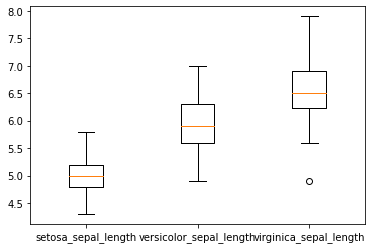

In [21]:
plt.boxplot([seto_sepal_length, versi_sepal_length, virgi_sepal_length])
plt.xticks([1,2,3],
           ['setosa_sepal_length',
            'versicolor_sepal_length',
            'virginica_sepal_length'])
plt.show()

In [23]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [28]:
newData = pd.concat([df.iloc[:, 0], df.iloc[:, -1]], axis=1)

In [29]:
newData = np.array(newData)

In [34]:
seto_array = newData[newData[: , 1]==0]

In [35]:
versi_array = newData[newData[: , 1]==1]

In [36]:
virgi_array = [newData[: , 1]==2]

In [44]:
virgi_array[:, 0]

array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
       5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
       6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. ,
       6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [48]:
F_statistics, p_val = stats.f_oneway(seto_array[:, 0],
                                     versi_array[:, 0],
                                     virgi_array[:, 0])

In [49]:
print('F statistics is:', F_statistics, 'p value is:', p_val)

F statistics is: 119.26450218450468 p value is: 1.669669190769383e-31


### (2) 방법 2

In [6]:
!pip install statsmodels

  Using cached statsmodels-0.14.0-cp38-cp38-win_amd64.whl (9.4 MB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


You should consider upgrading via the 'c:\users\stell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
df = df.rename(columns={'sepal length (cm)':'sepal_length'})

In [24]:
df['target'] = [i+1 for i in list(df['target'])]

In [25]:
df

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [26]:
iris_result = ols("sepal_length ~ target", data=df).fit()

In [28]:
sm.stats.anova_lm(iris_result, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,62.568100,62.568100,233.838996,2.890478e-32
Residual,148.0,39.600233,0.267569,NaN,NaN
